A non-profit healt organization has collected data baout patients in a diabetic speciality hospital, recently has turned into a covid-cure center. The organization has to see if there is any pattern to classify the patiets who has `survived` and `passed away`. Given below is the detail of the dataset.

**Detail of the dataset**

`Patient I.D.` --> Index of patient enrolment number

`Age`  --> Age of the patient

`Sex` --> Gender of the patient

`cp` --> Chest Pain type chest pain type

`trtbps` --> resting blood pressure (in mm Hg)

`chol` --> cholestoral in mg/dl fetched via BMI sensor

`fbs` --> fasting blood sugar , which has been categorised into three group based on a different magnitude

`restecg` --> resting electrocardiographic results

`thalachh` --> maximum heart rate achieved

`Addiction` --> Addiction of the patient

`keratin_type` --> Keratin type of the patient

`Diabetes_type` --> type of diabetes of the patient     

`Hemoglobin_level` --> level of hemoglobin of the patient 

`blood_group`  --> Blood group of the patient

`Immunity_level` --> Immunity level of the patient,which has been categorised into different group

`Affected_portion` --> Portion of organ effect by virus

`Breath_ratio` -->  state air to the time of inhalation ratio.

`Survive` --> whether a patient has overcome or passed away

First, we need to load all of our libraries we will use for this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_set.csv')

df.shape
#There are 7000 rows and 18 columns in this dataset

(7000, 18)

In [3]:
df.head()

,Patient I.D.,Age,Sex,cp,trtbps,chol,fbs,restecg,thalachh,Addiction,keratin_type,Diabetes_type,Hemoglobin_level,blood_group,Immunity_level,Affected_portion,Breath_ratio,Survive
0,1,29.0,Male,1,6.613849,240.859519,1,1,113.0895308,Nicotine - type A,3,type 2,7,O-,1,41.576901,21.55,Survived
1,2,30.0,Female,1,8.789486,253.220968,3,2,113.3518612,Nicotine - type A,2,type 1,6,B-,4,43.234092,24.23,Survived
2,3,29.0,Male,2,10.376325,237.148027,2,1,106.9501548,Drug-type B,2,type 3,8,B-,4,46.758422,44.97,Survived
3,4,30.0,Male,3,18.336148,245.179914,3,2,100.4835624,Alcohol,2,type 2,13,O+,2,47.254223,47.24,Survived
4,5,29.0,Female,1,17.285610,233.539891,2,2,122.7902658,Nicotine - type A,2,type 1,6,AB+,2,27.046348,28.74,Survived


In [4]:
df.dtypes
#Below are the datatypes belonging to each columns

Patient I.D.          int64
Age                 float64
Sex                  object
cp                    int64
trtbps              float64
chol                float64
fbs                   int64
restecg               int64
thalachh             object
Addiction            object
keratin_type          int64
Diabetes_type        object
Hemoglobin_level      int64
blood_group          object
Immunity_level        int64
Affected_portion    float64
Breath_ratio        float64
Survive              object
dtype: object

In [5]:

#The columns thalachh was considered as object datatype, however it consits of float values

# We could also notice a ? in the values of this column which we shall convert as a null value

df['thalachh'] = df['thalachh'].replace('?',np.nan)

df['thalachh'] = df['thalachh'].astype('float')



In [6]:
df_cat = df.select_dtypes('O')

df_cat.columns
#Categorical columns

Index(['Sex', 'Addiction', 'Diabetes_type', 'blood_group', 'Survive'], dtype='object')

In [7]:
df_num = df.select_dtypes(np.number)
df_num.columns
#Numerical columns

Index(['Patient I.D.', 'Age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg',
       'thalachh', 'keratin_type', 'Hemoglobin_level', 'Immunity_level',
       'Affected_portion', 'Breath_ratio'],
      dtype='object')

In [8]:
df.describe()

#Scaling is needed here which will be done in the later part

,Patient I.D.,Age,cp,trtbps,chol,fbs,restecg,thalachh,keratin_type,Hemoglobin_level,Immunity_level,Affected_portion,Breath_ratio
count,7000.000000,6401.000000,7000.000000,7000.000000,6376.000000,7000.000000,7000.000000,6924.000000,7000.000000,7000.000000,7000.000000,7000.000000,6593.000000
mean,3500.500000,60.390564,1.654286,14.096497,248.497664,1.676714,0.914429,111.994594,1.555143,9.518857,2.517000,40.878998,40.465292
std,2020.870275,18.420775,1.061300,5.131444,10.323672,1.159972,0.709753,7.006035,0.667956,2.285818,1.116834,11.183186,11.633303
min,1.000000,29.000000,0.000000,1.241648,212.122186,0.000000,0.000000,87.648451,1.000000,6.000000,1.000000,1.242888,3.010000
25%,1750.750000,45.000000,1.000000,9.422638,240.673116,1.000000,0.000000,107.245448,1.000000,8.000000,2.000000,33.232875,32.410000
50%,3500.500000,64.000000,2.000000,14.669709,249.221050,2.000000,1.000000,112.129117,1.000000,10.000000,3.000000,40.948939,39.890000
75%,5250.250000,77.000000,3.000000,18.366243,255.371556,3.000000,1.000000,116.770858,2.000000,12.000000,4.000000,48.629448,48.750000
max,7000.000000,91.000000,3.000000,27.644734,283.852277,3.000000,2.000000,139.690293,3.000000,13.000000,4.000000,84.045723,86.030000


In [9]:
df_cat.describe()

,Sex,Addiction,Diabetes_type,blood_group,Survive
count,7000,7000,7000,7000,7000
unique,2,7,3,8,2
top,Male,Nicotine - type A,type 1,O+,Survived
freq,4889,1468,3670,2474,5915


In [59]:
df_cat['Sex'].value_counts()/len(df)*100

Male      69.842857
Female    30.157143
Name: Sex, dtype: float64

In [60]:
df_cat['Addiction'].value_counts()/len(df)*100

Nicotine - type A    20.971429
others               14.614286
Drug-type A          14.242857
Drug-type C          14.242857
Alcohol              14.228571
Drug-type B          14.128571
Nicotine - type B     7.571429
Name: Addiction, dtype: float64

In [61]:
df_cat['Diabetes_type'].value_counts()/len(df)*100


type 1    52.428571
type 2    36.242857
type 3    11.328571
Name: Diabetes_type, dtype: float64

In [62]:
df_cat['blood_group'].value_counts()/len(df)*100

O+     35.342857
B+     19.914286
O-     14.314286
A+     10.571429
AB+     8.371429
B-      7.614286
A-      2.814286
AB-     1.057143
Name: blood_group, dtype: float64

In [63]:
df_cat['Survive'].value_counts()/len(df)*100

Survived       84.5
Passed away    15.5
Name: Survive, dtype: float64

In [10]:
df.isnull().sum()

#There are null valyes in age,chol,thalachh and Breath ratio

Patient I.D.          0
Age                 599
Sex                   0
cp                    0
trtbps                0
chol                624
fbs                   0
restecg               0
thalachh             76
Addiction             0
keratin_type          0
Diabetes_type         0
Hemoglobin_level      0
blood_group           0
Immunity_level        0
Affected_portion      0
Breath_ratio        407
Survive               0
dtype: int64

In [11]:
df.isnull().sum()/len(df)*100

#None of the null values are more than 80% , hence we shall impute the null values instead of dropping

Patient I.D.        0.000000
Age                 8.557143
Sex                 0.000000
cp                  0.000000
trtbps              0.000000
chol                8.914286
fbs                 0.000000
restecg             0.000000
thalachh            1.085714
Addiction           0.000000
keratin_type        0.000000
Diabetes_type       0.000000
Hemoglobin_level    0.000000
blood_group         0.000000
Immunity_level      0.000000
Affected_portion    0.000000
Breath_ratio        5.814286
Survive             0.000000
dtype: float64

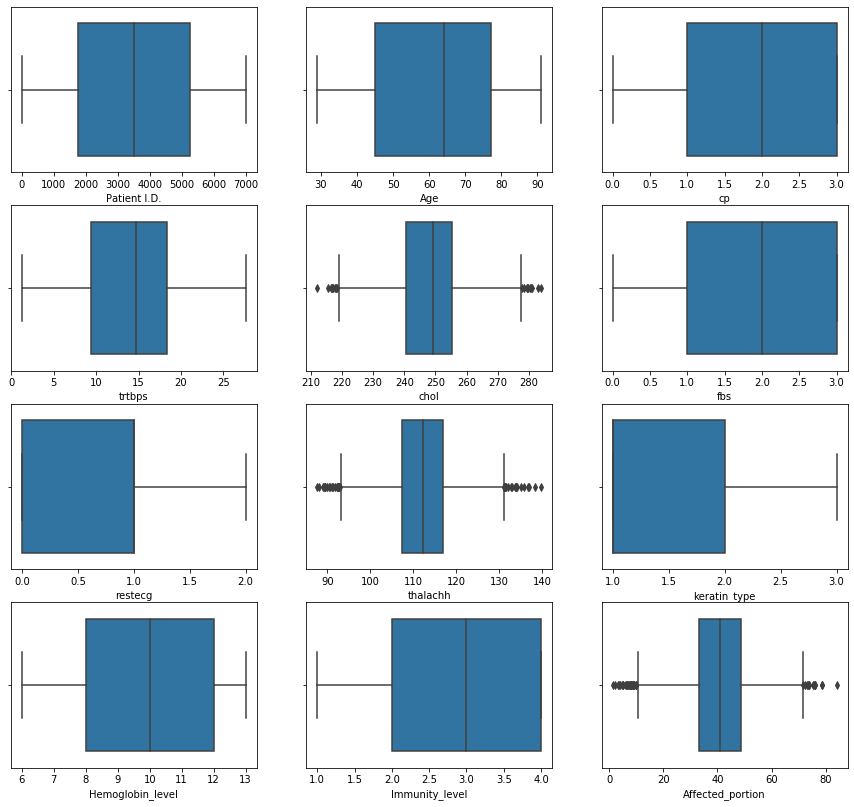

In [12]:
#Outlier check

fig,ax = plt.subplots(nrows = 4,ncols = 3,figsize = (15,14))
df_num = df.select_dtypes(np.number)
for i,j in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax = j)
    
    
plt.show()

In [13]:
#There are few outliers in Chol,Thalachh and Affected_portion

#However, There are no significant outliers from those columns that we need to treat for the model

In [14]:
#Imbalance check

df['Survive'].value_counts()/len(df)*100
#Data is highly imbalanced

Survived       84.5
Passed away    15.5
Name: Survive, dtype: float64

In [15]:
#dropping unique value columns

#Since Patient ID is a columns which only unique values,

#It does not add any value to our target columns, Hence we shall drop it from our dataframe

df = df.drop('Patient I.D.',axis = 1)

In [16]:
#Null value imputation

df_cat = df.select_dtypes('O')
df_cat.isnull().sum()
#No null values in categorical columns

Sex              0
Addiction        0
Diabetes_type    0
blood_group      0
Survive          0
dtype: int64

In [17]:
#Numerical null value imputation using median

df_num = df.select_dtypes(np.number)
from sklearn.impute import SimpleImputer

sim = SimpleImputer(strategy = 'median').fit_transform(df_num.values)
df_num = pd.DataFrame(sim,index = df_num.index,columns = df_num.columns)

df_num.isnull().sum()

Age                 0
cp                  0
trtbps              0
chol                0
fbs                 0
restecg             0
thalachh            0
keratin_type        0
Hemoglobin_level    0
Immunity_level      0
Affected_portion    0
Breath_ratio        0
dtype: int64

In [18]:
#Scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit_transform(df_num.values)
df_num = pd.DataFrame(ss,index = df_num.index,columns = df_num.columns)
df_num.describe()

,Age,cp,trtbps,chol,fbs,restecg,thalachh,keratin_type,Hemoglobin_level,Immunity_level,Affected_portion,Breath_ratio
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,4.410377e-15,3.517504e-16,1.123466e-16,-3.656504e-15,6.298295e-16,8.593919e-17,-6.371411e-16,-1.313870e-16,-7.654195e-17,2.479921e-16,4.944458e-17,2.889435e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.796761e+00,-1.558847e+00,-2.505292e+00,-3.697921e+00,-1.445581e+00,-1.288468e+00,-3.494499e+00,-8.311657e-01,-1.539540e+00,-1.358401e+00,-3.544512e+00,-3.314604e+00
25%,-7.764996e-01,-6.165389e-01,-9.108924e-01,-7.259256e-01,-5.834300e-01,-1.288468e+00,-6.758865e-01,-8.311657e-01,-6.645174e-01,-4.629489e-01,-6.837648e-01,-6.591542e-01
50%,1.870802e-01,3.257694e-01,1.117138e-01,6.686522e-02,2.787211e-01,1.205737e-01,1.909781e-02,-8.311657e-01,2.105055e-01,4.325035e-01,6.254561e-03,-4.799322e-02
75%,9.239354e-01,1.268078e+00,8.321344e-01,6.226194e-01,1.140872e+00,1.205737e-01,6.761141e-01,6.660448e-01,1.085528e+00,1.327956e+00,6.930944e-01,6.898286e-01
max,1.717472e+00,1.268078e+00,2.640427e+00,3.581236e+00,1.140872e+00,1.529615e+00,3.974826e+00,2.163255e+00,1.523040e+00,1.327956e+00,3.860242e+00,4.038813e+00


In [19]:
#Clean df 

df  = pd.concat([df_num,df_cat],axis = 1)

In [20]:
df.isnull().sum()

Age                 0
cp                  0
trtbps              0
chol                0
fbs                 0
restecg             0
thalachh            0
keratin_type        0
Hemoglobin_level    0
Immunity_level      0
Affected_portion    0
Breath_ratio        0
Sex                 0
Addiction           0
Diabetes_type       0
blood_group         0
Survive             0
dtype: int64

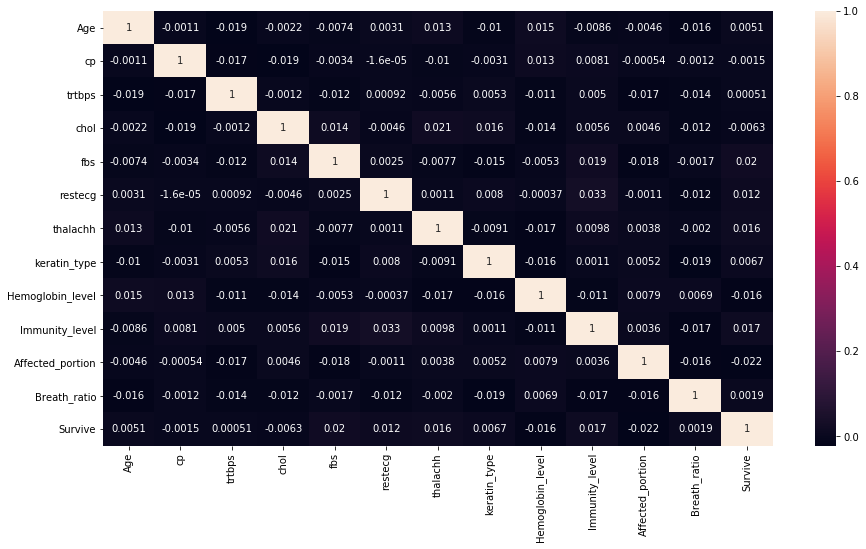

In [21]:
#Changing target to int dtype

df['Survive'] = pd.get_dummies(df['Survive'],drop_first = True)

plt.figure(figsize = (15,8))

sns.heatmap(df.corr(),annot = True)

In [22]:
# We can see that none of the independant variables have a high corelation with the target

#Out of all features, Fbs has the highest positive correlation with the target

#Features like Age,cp,keratin_type,immunity level,rest_ecg have a slight positive correlation with the target

# Breath_ratio,Affected_portion,chol,trtbps,Hemoglobin level have a negative correlation with the target

In [23]:
#From the heatmap it is evident that there is no multicollinearity within independent features, 

#Hence it is not required to drop any features as of now.

In [24]:
#Train-Test split

from sklearn.model_selection import train_test_split

x = df.drop('Survive',axis = 1)

x = pd.get_dummies(x,drop_first = True)

y = df['Survive']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)


In [25]:
from scipy.stats import ttest_ind

#h0: The train and test data represent the overall data
#h1: The train and test data do not represent the overall data

ttest_ind(y_train,y_test)

Ttest_indResult(statistic=-1.1170059562602204, pvalue=0.2640301270150983)

In [26]:
ttest_ind(x_train,x_test)

Ttest_indResult(statistic=array([ 0.43576409, -0.58978584, -1.36598969, -0.47597265,  0.09218215,
        0.26824281,  0.8236849 ,  0.07028049,  1.34193636,  1.60456888,
        0.63694632, -1.6877659 ,  0.03977602,  1.20147914,  1.62497793,
        0.4551786 ,  1.05063365, -0.49290678, -0.74565254,  0.05967555,
        0.23861603, -0.6149932 , -0.20715148,  0.81600131,  0.86201808,
       -0.40313563,  0.55645491, -0.9978745 ]), pvalue=array([0.66302134, 0.55535328, 0.17198609, 0.63410872, 0.92655596,
       0.78852033, 0.41014669, 0.94397242, 0.17966017, 0.10863384,
       0.52418065, 0.09150074, 0.96827283, 0.22960605, 0.10421229,
       0.64899488, 0.29346316, 0.62209392, 0.45590238, 0.95241575,
       0.81141032, 0.53857921, 0.83589758, 0.41452716, 0.3887071 ,
       0.68686076, 0.5779177 , 0.31837472]))

In [27]:
# We can see that p value is greater than alpha(0.5), hence we accept H0

#The train and test data represents the overall data well

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


x = df.drop('Survive',axis = 1)

x = pd.get_dummies(x,drop_first = True)

y = df['Survive']
dtc = DecisionTreeClassifier(random_state = 1)

model = dtc.fit(x_train,y_train)

# I've selected Decision tree classifer as the algorithm for my base model

# SInce the target columns is categorical in nature, I've selected a classification algorithm

# Since Decision Tree classifier is one of the best algorithms to use for decision-solving problems like ours,

#I've chosen this for my base model

In [29]:
print('The train accuracy is',model.score(x_train,y_train))
print('The test accuracy is',model.score(x_test,y_test))

# The overall accurcy for training data is 100% and test is 0.73

# The accuracy and model is not good since there is severe overfitting in our model

# A model can never have 100% accuracy in either train or test.

# Hence, we shall regularize the data (or) select significant features using Recursive feature elmination

The train accuracy is 1.0
The test accuracy is 0.7314285714285714


In [30]:
y_pred = model.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.17      0.21      0.19       310
           1       0.86      0.82      0.84      1790

    accuracy                           0.73      2100
   macro avg       0.51      0.52      0.51      2100
weighted avg       0.76      0.73      0.74      2100



In [31]:
#Precision basically tells you how many are correctly classified within the class

#We can see that there is very less correctly classified for Not suvived patients and high for Survived patients


#Recall tells you how many of this clas we have found over the whole number of elements in the indivdual classes

# The recall score is high for predicting Survival of patients and very low for non-survival


#F1 score is the harmonic mean of Precision and recall

#The model is not able to predict the minorty class well

In [37]:
from sklearn.feature_selection import RFE
dtc = DecisionTreeClassifier(random_state = 1)
rfe_model = RFE(estimator = dtc,n_features_to_select = 10)

rfe_model = rfe_model.fit(x_train,y_train)

In [38]:
df_rfe = pd.DataFrame()
df_rfe['features'] = x.columns
df_rfe['ranking'] = rfe_model.ranking_

top = df_rfe[df_rfe['ranking']==1]

top = top.features.to_list()
top

#I have converted the features with ranking 1 from RFE as a list shown below in the output

['Age',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'thalachh',
 'Hemoglobin_level',
 'Immunity_level',
 'Affected_portion',
 'Breath_ratio']

In [40]:
#Selecting only the features selected from RFE

x_top = x[top]

x_train,x_test,y_train,y_test = train_test_split(x_top,y,test_size = 0.3)

model_top = dtc.fit(x_train,y_train)


In [41]:
print('The train accuracy is',model_top.score(x_train,y_train))
print('The test accuracy is',model_top.score(x_test,y_test))



#Still overfitting is present as the training accuracy is at 100% similiar to the base model

# We shall regularize the model using Grid Search CV




The train accuracy is 1.0
The test accuracy is 0.7080952380952381


In [42]:
from sklearn.model_selection import GridSearchCV
tuned_params = [{'criterion':['gini','entropy'],'max_depth':range(2,10),'min_samples_split': range(2,10)}]
grid = GridSearchCV(estimator = dtc,param_grid = tuned_params,cv = 5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10),
                          'min_samples_split': range(2, 10)}])

In [43]:
grid.best_params_

#Below are the best parameters from Grid Search

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}

In [45]:
dtc_tuned = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2,min_samples_split = 2)

model_final = dtc_tuned.fit(x_train,y_train)

In [46]:
print('The train accuracy is',model_final.score(x_train,y_train))
print('The test accuracy is',model_final.score(x_test,y_test))

The train accuracy is 0.8483673469387755
The test accuracy is 0.8371428571428572


In [ ]:
# Our final model is very good with no overfitting!


In [ ]:
# Changes made from base model => 

# Our first base model had severe overfitting

# We first tried using Recusrive feature elimination and selected 10 features out of all.

# The second model was built using only those 10 selected features as independent variables

# We still found severe overfitting in the second model

# Now we tried to regularize the model using Grid Search CV with 5 cross fold validation

# After fitting the best parameters obtained from the grid search,

# Our final model has a train accuracy of 84% and test accuracy of 83%

# Both train and test accuracy are almost equal which means there is no overfitting in our data!

# We have now successfully imporoved our model with good accuracy and no overfitting or underfitting!

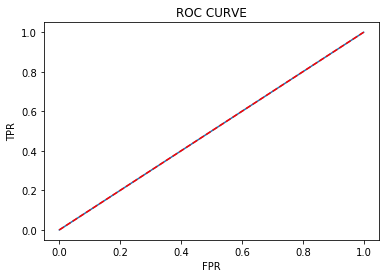

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve

y_pred = model_final.predict(x_test)

fpr,tpr,th = roc_curve(y_test,y_pred)

plt.plot(fpr,tpr,label = 'Decision Tree classifier')

plt.plot([0,1],[0,1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [58]:
roc_auc_score(y_test,y_pred)

0.5

In [ ]:
#The ROC AUC score is 0.5 which is less than an ideal model, 

# however from the classification report,

# we could see that our model has predicted one class very well with more than 80% accuracy




In [50]:
print(classification_report(y_test,y_pred))

#The survived patients are predicted really well but the non survived pateints are not predicted properly in our model



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       342
           1       0.84      1.00      0.91      1758

    accuracy                           0.84      2100
   macro avg       0.42      0.50      0.46      2100
weighted avg       0.70      0.84      0.76      2100



/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#The reason for this issue is the imbalance in our data

df['Survive'].value_counts()/len(df)*100


1    84.5
0    15.5
Name: Survive, dtype: float64

In [ ]:

# We can see very high imbalance in the target column which is why we are not able to predict the minoity classes well

# Using our final model we can predict the patients who are more likely to survive with good precision and accuracy

# The features which contribute more to the Survival of the patients are =>

# Age,cp,trtbps,chol,fbs,thalachh,Hemoglobin_level,immunity level, Affected portion and Breath Ratio

# Scope for improvement =>

# Imbalance treatment on the data can help provide a better prediction and accuracy for the minoriy class(non-survied)

